**Crux Python Assesment**

In [1]:
import requests
import pandas as pd
from pathlib import Path

In [2]:
data = Path("data/data.csv")
mappings = Path("data/maping.csv")
if not data.is_file():
    source = "https://storage.googleapis.com/coderpad/"
    datafile = "data.csv"
    response = requests.get(source + datafile)
    print("Downloading and Saving " + datafile)
    with open(data, 'wb') as f:
        f.write(response.content)
if not mappings.is_file():
    mapfile = "maping.csv"
    response = requests.get(source + mapfile)
    print("Downloading and Saving " + mapfile)
    with open(mappings, 'wb') as f:
        f.write(response.content)

In [3]:
dfData = pd.read_csv(data, sep=",")

In [4]:
dfData.head(5)

,Period,Country,Industry,Product_Code,Insight_Score,Price,Volume,Cost,Sales,Margin,Material_and_Fuel_Cost,Domestic_Price,Export_Price,Service_Cost,Labour_Cost,Manufacturing_Activity,Employment,Labour_Productivity,Wages
0,2017-02-28 00:00:00.000,United States,MATERIALS,US10.1,32.4,5.3,13.0,-2.8,18.3,8.1,14.3,6.6,0.0,14.3,-22.1,17.9,-6.0,22.3,0.1
1,2015-05-31 00:00:00.000,United States,MATERIALS,US10.1,-25.6,-2.8,-12.3,1.6,-15.2,-4.5,-13.0,-2.4,0.0,-13.0,4.3,-14.7,-10.9,-2.4,1.9
2,2014-04-30 00:00:00.000,United States,MATERIALS,US10.1,-2.8,-3.3,4.0,0.1,0.7,-3.4,8.6,-3.8,0.0,8.6,-4.9,6.2,-4.9,8.9,4.0
3,2016-02-29 00:00:00.000,United States,MATERIALS,US10.1,-48.7,-5.3,-26.3,5.8,-31.6,-11.1,-13.4,-6.0,0.0,-13.4,9.6,-24.2,-22.0,-8.5,1.1
4,2015-10-31 00:00:00.000,United States,MATERIALS,US10.1,-15.7,-2.7,-9.1,-0.8,-11.8,-1.9,-9.7,-3.3,0.0,-9.7,-8.4,-10.5,-15.1,7.4,-1.0


*Investigating Insight Score*

In [5]:
any(dfData.Insight_Score.isnull())

False

In [68]:
dfData.groupby(['Period']).count().head(5)

,Country,Industry,Product_Code,Insight_Score,Price,Volume,Cost,Sales,Margin,Material_and_Fuel_Cost,Domestic_Price,Export_Price,Service_Cost,Labour_Cost,Manufacturing_Activity,Employment,Labour_Productivity,Wages
Period,,,,,,,,,,,,,,,,,,
2012-07-31 00:00:00.000,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
2012-08-31 00:00:00.000,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
2012-09-30 00:00:00.000,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
2012-10-31 00:00:00.000,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
2012-11-30 00:00:00.000,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023207DFFC88>]],
      dtype=object)

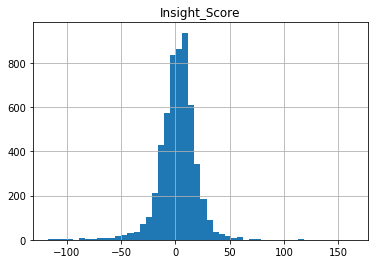

In [7]:
%matplotlib inline
dfData.hist(column='Insight_Score', bins=50)

In [8]:
dfData.groupby(['Industry']).mean()

,Insight_Score,Price,Volume,Cost,Sales,Margin,Material_and_Fuel_Cost,Domestic_Price,Export_Price,Service_Cost,Labour_Cost,Manufacturing_Activity,Employment,Labour_Productivity,Wages
Industry,,,,,,,,,,,,,,,
CONSUMER DISCRETIONARY,4.546232,1.108768,2.386014,0.198478,3.496087,0.896522,-0.110435,1.108261,0.020797,2.293188,0.960000,2.347681,1.354420,1.034710,2.026594
CONSUMER STAPLES,3.608421,0.482807,1.443684,-0.462105,1.927719,0.864825,-0.660000,0.333860,-0.066140,1.810526,1.542281,1.063333,1.618421,0.440439,1.997895
ENERGY,-10.693333,-9.234167,3.658333,-4.794167,-5.572500,-4.438333,-3.571667,-9.140000,0.000000,2.150000,0.005000,3.681667,0.792500,2.805833,2.767500
HEALTHCARE,4.140833,3.210833,-0.710000,1.420833,2.141667,1.430833,0.440000,3.215000,-1.524167,2.150000,2.721667,-0.727500,1.196667,-1.818333,1.049167
INDUSTRIALS,-0.133968,0.478254,-0.764841,0.471746,-0.286270,0.006349,-1.276190,0.519683,0.011587,2.150000,2.441587,-1.167381,0.306349,-0.779762,2.140397
INFORMATION TECHNOLOGY,4.508333,-2.128889,3.899444,-4.167778,1.766667,2.037222,-1.245000,-1.780000,-1.276111,2.150000,-10.600556,6.723333,-3.216111,9.353333,-1.167778
MATERIALS,1.490303,0.125076,0.543864,-0.052652,0.668939,0.185758,-1.163182,0.206970,-0.180000,1.994394,1.070455,0.583485,-0.240909,0.648939,1.740833


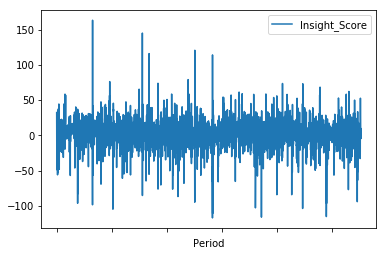

In [9]:
dfData.plot(x='Period', y='Insight_Score')

Not really sure what Insight_Score is supposed to represent. A credit/performance rating of some kind? 

Insight_Score is a float with high variance. No NA's.

Filter by removing outliers?

In [10]:
sd = dfData.Insight_Score.std()
mean = dfData.Insight_Score.mean()
sd, mean

(17.642166698025935, 2.21213768115942)

In [11]:
dfData_filtered = dfData[(dfData.Insight_Score < mean+ 3*sd) & (dfData.Insight_Score > mean-3*sd)]

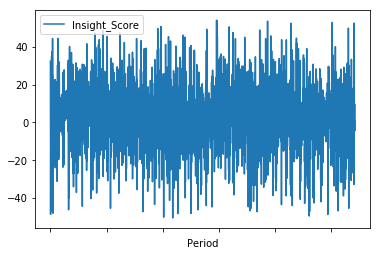

In [12]:
dfData_filtered.plot(x='Period', y='Insight_Score')

*Looking into Mappings*

In [13]:
dfMap = pd.read_csv(mappings, sep=",")

In [14]:
dfMap.head(5)

,ProductCode,ProductName,Benchmark
0,FR15-36,15-36 - Manufacturers,FR52
1,FR52.11,52.11 - Food Retailers,FR52
2,GE15-36,15-36 - Manufacturers,GE52
3,GE52.11,52.11 - Food Retailers,GE52
4,GE52.46,52.46 - DIY Retailers,GE52


Inner join (would need more business context to understand if left join makes more sense, etc)

In [15]:
dfMap.rename(columns={'ProductCode': 'Product_Code'}, inplace=True)

dfmerged = pd.merge(dfData_filtered, dfMap, on='Product_Code')

In [16]:
dfmerged.head(5)

,Period,Country,Industry,Product_Code,Insight_Score,Price,Volume,Cost,Sales,Margin,...,Domestic_Price,Export_Price,Service_Cost,Labour_Cost,Manufacturing_Activity,Employment,Labour_Productivity,Wages,ProductName,Benchmark
0,2017-02-28 00:00:00.000,United States,MATERIALS,US10.1,32.4,5.3,13.0,-2.8,18.3,8.1,...,6.6,0.0,14.3,-22.1,17.9,-6.0,22.3,0.1,10.1 - Coal Miners,US15-36
1,2015-05-31 00:00:00.000,United States,MATERIALS,US10.1,-25.6,-2.8,-12.3,1.6,-15.2,-4.5,...,-2.4,0.0,-13.0,4.3,-14.7,-10.9,-2.4,1.9,10.1 - Coal Miners,US15-36
2,2014-04-30 00:00:00.000,United States,MATERIALS,US10.1,-2.8,-3.3,4.0,0.1,0.7,-3.4,...,-3.8,0.0,8.6,-4.9,6.2,-4.9,8.9,4.0,10.1 - Coal Miners,US15-36
3,2016-02-29 00:00:00.000,United States,MATERIALS,US10.1,-48.7,-5.3,-26.3,5.8,-31.6,-11.1,...,-6.0,0.0,-13.4,9.6,-24.2,-22.0,-8.5,1.1,10.1 - Coal Miners,US15-36
4,2015-10-31 00:00:00.000,United States,MATERIALS,US10.1,-15.7,-2.7,-9.1,-0.8,-11.8,-1.9,...,-3.3,0.0,-9.7,-8.4,-10.5,-15.1,7.4,-1.0,10.1 - Coal Miners,US15-36


*Analysis*

Simple outlier detection might be using standard deviation, so anything above or below 3 standard deviations could be flagged, aggregated by Industry, Country, Period, etc depending on the business context. For example,

In [17]:
mat_prices = dfmerged[dfmerged.Industry == 'MATERIALS'].Price
mat_sd = mat_prices.std()
mat_avg = mat_prices.mean()
outliers_materials_prices = dfmerged[(dfmerged.Industry == 'MATERIALS') & 
                    ((dfmerged.Price > mat_avg + 3*mat_sd) | (dfmerged.Price < mat_avg - 3*mat_sd))]

In [53]:
outliers_materials_prices.head(5)

,Period,Country,Industry,Product_Code,Insight_Score,Price,Volume,Cost,Sales,Margin,...,Domestic_Price,Export_Price,Service_Cost,Labour_Cost,Manufacturing_Activity,Employment,Labour_Productivity,Wages,ProductName,Benchmark
179,2013-12-31 00:00:00.000,United States,MATERIALS,US13,-43.5,-15.7,-4.1,2.1,-19.8,-17.8,...,-16.5,0.0,2.0,1.0,-3.5,-5.7,1.7,2.7,13 - Metal miners,US15-36
180,2015-08-31 00:00:00.000,United States,MATERIALS,US13,-46.3,-15.3,-7.1,2.7,-22.4,-17.9,...,-19.9,0.0,2.0,-0.6,-6.9,-6.9,-1.3,-1.9,13 - Metal miners,US15-36
182,2013-11-30 00:00:00.000,United States,MATERIALS,US13,-40.1,-15.3,-2.8,0.7,-18.1,-16.0,...,-13.6,0.0,2.0,-4.9,-6.6,-5.9,4.5,-0.4,13 - Metal miners,US15-36
187,2016-03-31 00:00:00.000,United States,MATERIALS,US13,-35.8,-15.9,-1.8,0.1,-17.8,-16.0,...,-11.8,0.0,2.5,-7.4,-2.9,-9.1,8.2,0.8,13 - Metal miners,US15-36
194,2017-03-31 00:00:00.000,United States,MATERIALS,US13,43.4,18.8,0.4,0.7,19.3,18.2,...,14.1,0.0,2.9,-1.6,1.4,0.8,1.3,-0.2,13 - Metal miners,US15-36


Since period is a timeseries, could individually analyze by product codes and use, for example, an ARIMA model to detect outliers. To save time, I'll steal some outlier code from https://www.datascience.com/blog/python-anomaly-detection, refactored for python3

In [42]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')

def moving_average(data, window_size):
    """ Computes moving average using discrete linear convolution of two one dimensional sequences.
    Args:
    -----
            data (pandas.Series): independent variable
            window_size (int): rolling window size

    Returns:
    --------
            ndarray of linear convolution

    References:
    ------------
    [1] Wikipedia, "Convolution", http://en.wikipedia.org/wiki/Convolution.
    [2] API Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

    """
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using stationary standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies

    """
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in zip(count(),
                                                                                           y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 60)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'], dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    print(x_anomaly, y_anomaly)
    plt.plot(x_anomaly, y_anomaly, "r*", markersize=5)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

In [54]:
dfOutliers = dfmerged.sort_values(by='Period')
x = dfOutliers[(dfOutliers.Industry == 'MATERIALS') & (dfOutliers.Product_Code == 'US20.3')].Period
Y = dfOutliers[(dfOutliers.Industry == 'MATERIALS') & (dfOutliers.Product_Code == 'US20.3')].Price

[ 2  3  6  7 11 18 19 23 55 56] [13.2 14.2 16.9 17.9  4.2 -6.  -5.7  2.7  6.9  7.1]


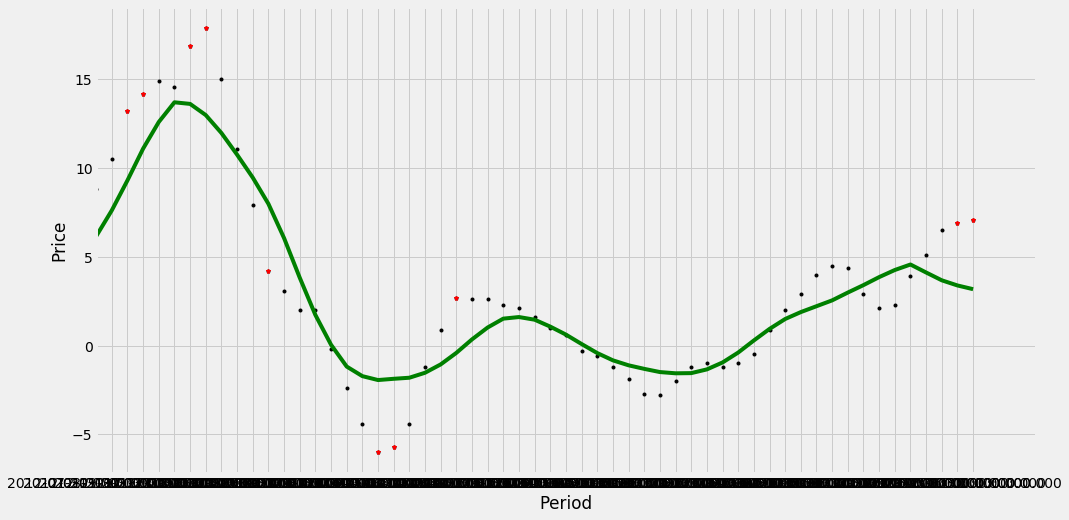

In [67]:
plot_results(x, y=Y, window_size=10, text_xlabel="Period", sigma_value=1.5,
             text_ylabel="Price")
events = explain_anomalies(Y, window_size=10, sigma=2)

Above red points show anomalies based on moving average std. Play around with different product codes, window sizes, sigmas, etc.

Show date (period) of highest and lowest Insight_Score per Industry.

In [22]:
idx_max = dfOutliers.groupby(['Industry'])['Insight_Score'].transform(max) == dfOutliers['Insight_Score']
idx_min = dfOutliers.groupby(['Industry'])['Insight_Score'].transform(min) == dfOutliers['Insight_Score']

highest = dfOutliers[idx_max][['Industry', 'Period', 'Insight_Score']].sort_values('Industry')
lowest = dfOutliers[idx_min][['Industry', 'Period', 'Insight_Score']].sort_values('Industry')
highest, lowest

(                    Industry                   Period  Insight_Score
 5062  CONSUMER DISCRETIONARY  2012-12-31 00:00:00.000           53.7
 2962        CONSUMER STAPLES  2014-12-31 00:00:00.000           50.0
 794                   ENERGY  2013-09-30 00:00:00.000           54.2
 3803              HEALTHCARE  2015-08-31 00:00:00.000           29.5
 5334             INDUSTRIALS  2012-08-31 00:00:00.000           50.9
 2116  INFORMATION TECHNOLOGY  2014-05-31 00:00:00.000           39.2
 965                MATERIALS  2013-01-31 00:00:00.000           53.8,
                     Industry                   Period  Insight_Score
 1174  CONSUMER DISCRETIONARY  2017-06-30 00:00:00.000          -27.1
 3077        CONSUMER STAPLES  2015-06-30 00:00:00.000          -45.5
 1252                  ENERGY  2015-03-31 00:00:00.000          -50.6
 2297              HEALTHCARE  2014-05-31 00:00:00.000          -16.9
 2473             INDUSTRIALS  2016-09-30 00:00:00.000          -49.6
 700   INFORMATION 

Which industries are the most correlated?

In [23]:
dfmerged.Industry.unique()

array(['MATERIALS', 'CONSUMER DISCRETIONARY', 'CONSUMER STAPLES',
       'INDUSTRIALS', 'INFORMATION TECHNOLOGY', 'ENERGY', 'HEALTHCARE'],
      dtype=object)

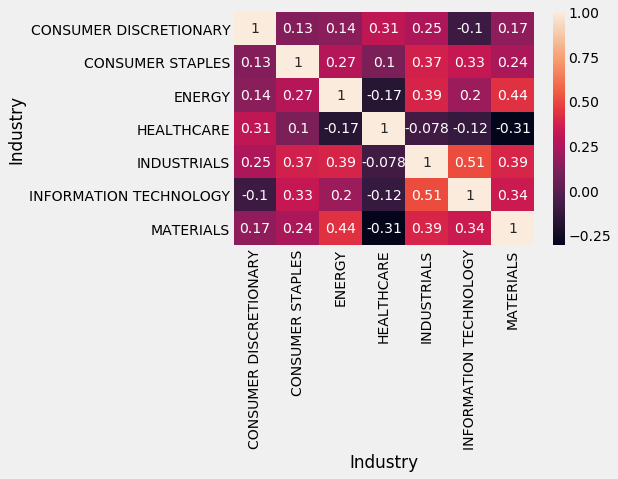

In [25]:
corr = []
industries = dfmerged.Industry.unique()
dfCorr = dfmerged.groupby(['Period', 'Industry'], as_index=False).mean()
# print(dfCorr)
finaldf = None
counts = 1
for acolumn in dfCorr.columns:
    if(dfCorr[acolumn].dtype == np.number):
        corrcol = dfCorr.pivot(index = 'Period', columns = 'Industry', values = acolumn)
        if finaldf is not None:
            finaldf += corrcol.corr().fillna(value=0)
            counts +=1
        else:
            finaldf = corrcol.corr().fillna(value=0)

import seaborn
finaldf = finaldf/counts
finaldf['ENERGY']['ENERGY'] = 1
seaborn.heatmap(finaldf, annot=True)
plt.show()



Highest correlation between Information Technology and Industrials, Energy and Materials.